In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('SalaryData_Train(1).csv.crdownload')

In [3]:
test=pd.read_csv('SalaryData_Test(1).csv')

In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11493 entries, 0 to 11492
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            11493 non-null  int64 
 1   workclass      11493 non-null  object
 2   education      11493 non-null  object
 3   educationno    11493 non-null  int64 
 4   maritalstatus  11493 non-null  object
 5   occupation     11493 non-null  object
 6   relationship   11493 non-null  object
 7   race           11493 non-null  object
 8   sex            11493 non-null  object
 9   capitalgain    11493 non-null  int64 
 10  capitalloss    11493 non-null  int64 
 11  hoursperweek   11493 non-null  int64 
 12  native         11492 non-null  object
 13  Salary         11492 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
train[train.isnull().any(axis=1)]


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
11492,49,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,NaN,NaN


In [9]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           1
Salary           1
dtype: int64

In [10]:
######dropping na values

In [11]:
train1=train.dropna()

In [12]:
train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11487,26,Self-emp-inc,HS-grad,9,Separated,Sales,Unmarried,White,Female,0,0,20,Honduras,<=50K
11488,32,Private,1st-4th,2,Never-married,Farming-fishing,Not-in-family,Other,Male,0,0,50,Mexico,<=50K
11489,55,Private,10th,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
11490,19,Private,12th,8,Married-spouse-absent,Other-service,Own-child,Other,Female,0,0,20,United-States,<=50K


In [13]:
train1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
### there is no na value in train data

In [14]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
#####there is no na values in test data

In [16]:
train1['Salary'].value_counts()

 <=50K    8661
 >50K     2831
Name: Salary, dtype: int64

In [17]:
test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [18]:
pd.crosstab(train1['occupation'],train1['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1286,182
Armed-Forces,2,0
Craft-repair,1156,349
Exec-managerial,765,716
Farming-fishing,327,38
Handlers-cleaners,463,33
Machine-op-inspct,655,97
Other-service,1201,51
Priv-house-serv,54,0


In [19]:
pd.crosstab(train1['workclass'],train1['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,214,133
Local-gov,557,229
Private,6644,1833
Self-emp-inc,186,226
Self-emp-not-inc,682,272
State-gov,376,138
Without-pay,2,0


In [20]:
pd.crosstab(train1['workclass'],train1['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,112,2,22,61,2,7,5,16,0,61,14,8,27,10
Local-gov,118,0,51,75,13,12,4,70,0,278,113,4,11,37
Private,1093,0,1165,989,166,469,711,1047,54,824,74,1119,266,500
Self-emp-inc,10,0,35,154,16,1,7,10,0,53,2,110,1,13
Self-emp-not-inc,27,0,212,136,162,5,19,56,0,143,3,144,11,36
State-gov,108,0,20,66,4,2,6,53,0,169,50,2,23,11
Without-pay,0,0,0,0,2,0,0,0,0,0,0,0,0,0


 <=50K    8661
 >50K     2831
Name: Salary, dtype: int64

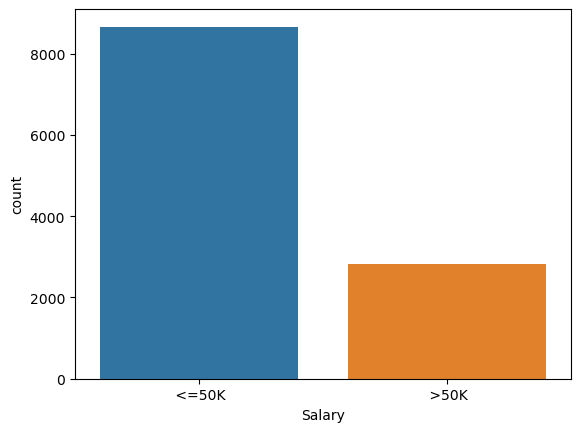

In [21]:
sns.countplot(x='Salary',data=train1)
train1['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

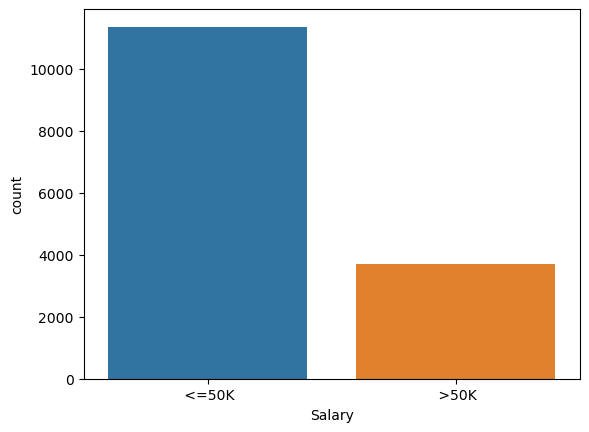

In [22]:
sns.countplot(x='Salary',data=test)
test['Salary'].value_counts()

<AxesSubplot:xlabel='occupation', ylabel='workclass'>

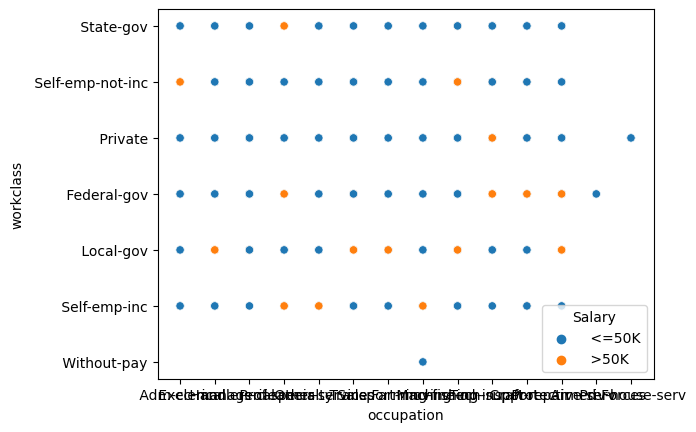

In [23]:
sns.scatterplot(train1['occupation'],train1['workclass'],hue=train1['Salary'])

<AxesSubplot:xlabel='education'>

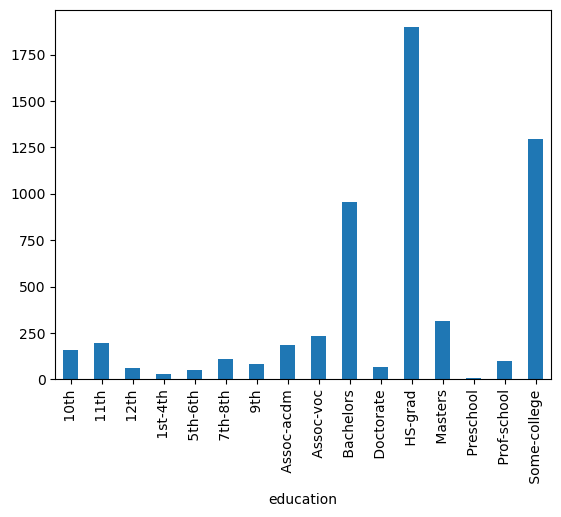

In [24]:
pd.crosstab(train1['Salary'],train1['education']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

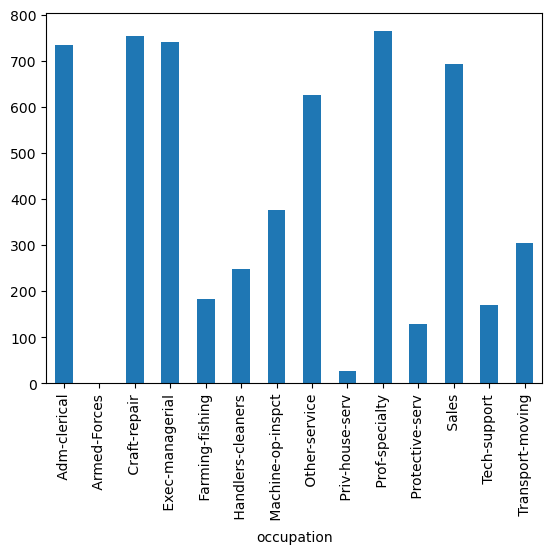

In [25]:
pd.crosstab(train1['Salary'],train1['occupation']).mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

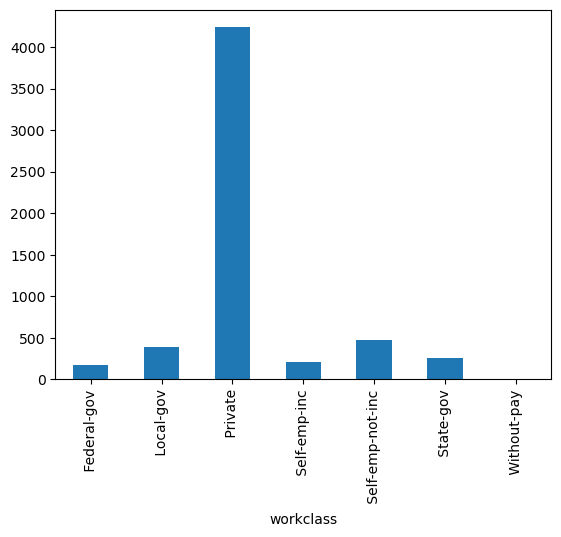

In [26]:
pd.crosstab(train1['Salary'],train1['workclass']).mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

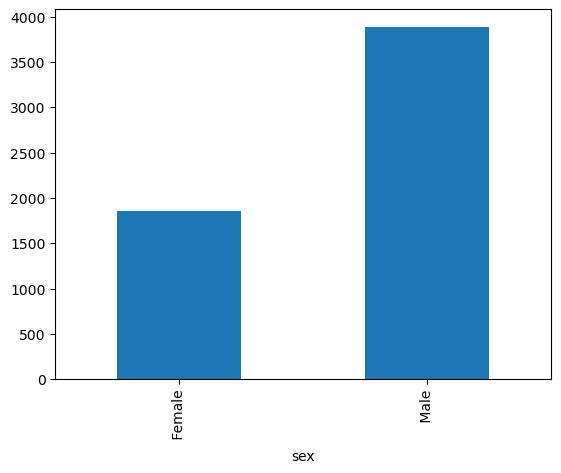

In [27]:
pd.crosstab(train1['Salary'],train1['sex']).mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

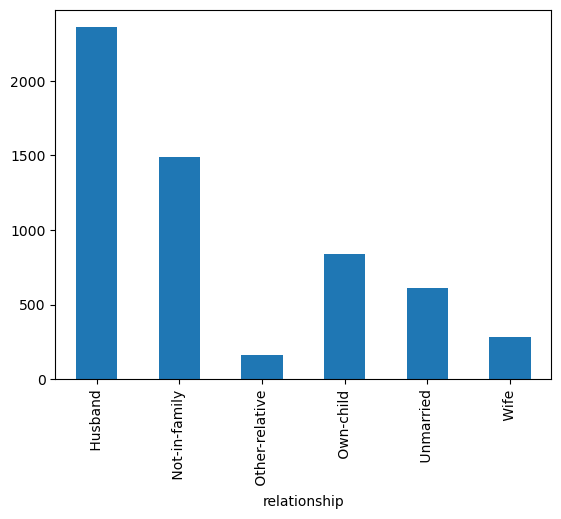

In [28]:
pd.crosstab(train1['Salary'],train1['relationship']).mean().plot(kind='bar')

In [29]:
#### matrix plot to observe realtionship between every column 

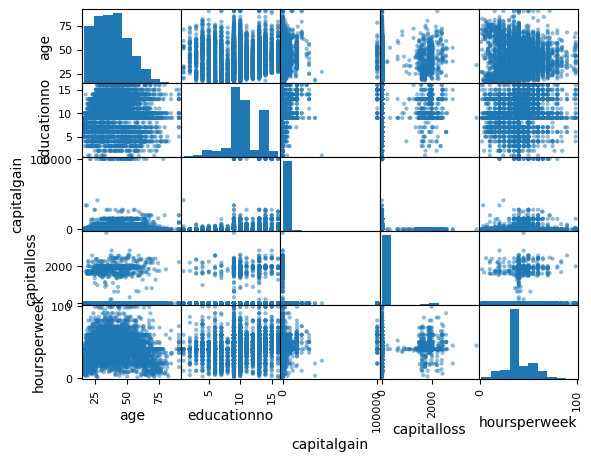

In [30]:
pd.plotting.scatter_matrix(train1)
#figsize=[1000,1000]
plt.show()

In [31]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]


In [32]:
##### preprocessing the data

In [33]:
number=LabelEncoder()
for i in string_columns:
    train1[i]=number.fit_transform(train1[i])
    test[i]=number.fit_transform(test[i])

In [34]:
train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11487,26,3,11,9,5,11,4,4,0,0,0,20,14,<=50K
11488,32,2,3,2,4,4,1,3,1,0,0,50,24,<=50K
11489,55,2,0,6,2,3,0,4,1,0,0,45,37,<=50K
11490,19,2,2,8,3,7,3,3,0,0,0,20,37,<=50K


In [35]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [36]:
colnames=train1.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [37]:
train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11487,26,3,11,9,5,11,4,4,0,0,0,20,14,<=50K
11488,32,2,3,2,4,4,1,3,1,0,0,50,24,<=50K
11489,55,2,0,6,2,3,0,4,1,0,0,45,37,<=50K
11490,19,2,2,8,3,7,3,3,0,0,0,20,37,<=50K


In [38]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [39]:
x_train1=train1[colnames[0:13]]
y_train1=train1[colnames[13]]
x_test=test[colnames[0:13]]
y_test=test[colnames[13]]

In [40]:
####normalmization

In [41]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [42]:
x_train1=norm_func(x_train1)
x_test=norm_func(x_test)

###### svm model

In [43]:
model_linear=SVC(kernel='linear',random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train1,y_train1)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [44]:
pred_test_linear=model_linear.predict(x_test)

In [45]:
np.mean(pred_test_linear==y_test)

0.8043824701195219

In [46]:
#####kernel=poly

In [47]:
model_poly=SVC(kernel='poly',random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train1,y_train1)

SVC(gamma=0.1, kernel='poly', random_state=40)

In [48]:
pred_test_poly=model_poly.predict(x_test)

In [49]:
np.mean(pred_test_poly==y_test)

0.8103585657370518

In [50]:
#####kernel=rbf

In [51]:
model_rbf=SVC(kernel='rbf',random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(x_train1,y_train1)

SVC(gamma=0.1, random_state=40)

In [52]:
pred_test_rbf=model_rbf.predict(x_test)

In [53]:
np.mean(pred_test_rbf==y_test)

0.8203851261620186

In [54]:
#####kernel=sigmoid

In [55]:
model_sigmoid=SVC(kernel='sigmoid',random_state=40,gamma=0.1,C=1.0)
model_sigmoid.fit(x_train1,y_train1)

SVC(gamma=0.1, kernel='sigmoid', random_state=40)

In [56]:
pred_test_sigmoid=model_sigmoid.predict(x_test)

In [57]:
np.mean(pred_test_sigmoid==y_test)

0.7857237715803452

In [58]:
########## SVM with gridsearch

In [59]:
#### kernel=rbf

In [60]:
clf=SVC()
param_grid=[{'kernel':['rbf'],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [61]:
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train1,y_train1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [62]:
gsv.best_params_,gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.8177006849055891)

In [63]:
clf=SVC(C=15,gamma=50)
clf.fit(x_train1,y_train1)
y_pred= clf.predict(x_test)

In [64]:
ac=accuracy_score(y_test,y_pred)*100
print('Accuracy=',ac)

Accuracy= 79.7011952191235


In [65]:
confusion_matrix(y_test,y_pred)

array([[10392,   968],
       [ 2089,  1611]], dtype=int64)

In [66]:
### kernel=linear

In [67]:
clf= SVC()
parma_grid = [{'kernel' : ["linear"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [68]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train1,y_train1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['linear'],
                          'random_state': [40]}])

In [69]:
gsv.best_params_ , gsv.best_score_


({'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.8031680478298711)

In [70]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train1 , y_train1)
y_pred = clf.predict(x_test)

In [71]:
ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", ac)

Accuracy = 79.7011952191235


In [72]:
confusion_matrix(y_test,y_pred)

array([[10392,   968],
       [ 2089,  1611]], dtype=int64)

In [73]:
###### kernel==ploy

In [74]:
clf= SVC()
parma_grid = [{'kernel' : ["poly"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [75]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train1,y_train1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['poly'],
                          'random_state': [40]}])

In [76]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 40},
 0.8039517160479812)

In [77]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train1, y_train1)
y_pred = clf.predict(x_test)

In [78]:
ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", ac)

Accuracy = 79.7011952191235


In [79]:
confusion_matrix(y_test,y_pred)

array([[10392,   968],
       [ 2089,  1611]], dtype=int64)

In [80]:
#### kernel=sigmoid

In [81]:
clf= SVC()
parma_grid = [{'kernel' : ["sigmoid"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [82]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train1,y_train1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['sigmoid'],
                          'random_state': [40]}])

In [83]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 40},
 0.7836766942899308)

In [84]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train1 , y_train1)
y_pred = clf.predict(x_test)

In [85]:
ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", ac)

Accuracy = 79.7011952191235


In [86]:
confusion_matrix(y_test,y_pred)

array([[10392,   968],
       [ 2089,  1611]], dtype=int64)